# Lab1 - Arytmetyka komputerowa

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

In [2]:
bitstring(Float16(1/3))

"0011010101010101"

In [3]:
bitstring(Float32(1/3))

"00111110101010101010101010101011"

In [4]:
bitstring(Float64(1/3))

"0011111111010101010101010101010101010101010101010101010101010101"

In [5]:
bitstring(convert(Float64, Float16(1/3)))

"0011111111010101010101000000000000000000000000000000000000000000"

In [6]:
decode16(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode16(Float16(1/3))

('0', "01101", "0101010101")

x = znak * mantysa * 2^cecha

In [7]:
# mantysa
significand(Float16(1/3))

Float16(1.333)

In [8]:
# cecha
exponent(Float16(1/3))

-2

<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zmiennoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

In [9]:
# push!(collection, items...) -> collection
# Insert one or more ``items`` at the end of ``collection``.

c = Float64[]
a = Float64(1.0)
r = 1:10
for i = r
    push!(c,a)
    a = nextfloat(a)
end
map(x -> bitstring(x), c)

10-element Array{String,1}:
 "0011111111110000000000000000000000000000000000000000000000000000"
 "0011111111110000000000000000000000000000000000000000000000000001"
 "0011111111110000000000000000000000000000000000000000000000000010"
 "0011111111110000000000000000000000000000000000000000000000000011"
 "0011111111110000000000000000000000000000000000000000000000000100"
 "0011111111110000000000000000000000000000000000000000000000000101"
 "0011111111110000000000000000000000000000000000000000000000000110"
 "0011111111110000000000000000000000000000000000000000000000000111"
 "0011111111110000000000000000000000000000000000000000000000001000"
 "0011111111110000000000000000000000000000000000000000000000001001"

In [10]:
# machine epsilon - distance between two adjacent representable floating-point numbers
# eps(Float64) is same as eps() - gives distance between 1.0 and next larger representable floating-point value
# eps(x) - gives absolute difference between x value and the next representable floating point value

println(eps())
println(eps(1.0))
println(eps(14.6))

2.220446049250313e-16
2.220446049250313e-16
1.7763568394002505e-15


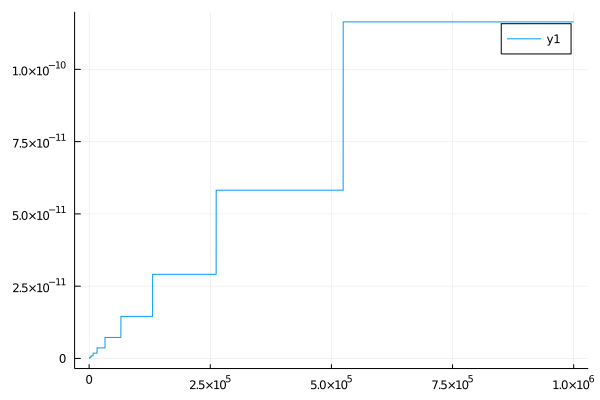

In [11]:
using Plots
x = 1.0:100.0:1000000.0;
y = eps.(x);  # elementwise eps(x)

# scatter(x,y)
plot(x,y)